In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')



In [4]:
dataframe = pd.read_csv("C:/Users/mdelabarra/Desktop/datasets python/analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [174]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [175]:
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


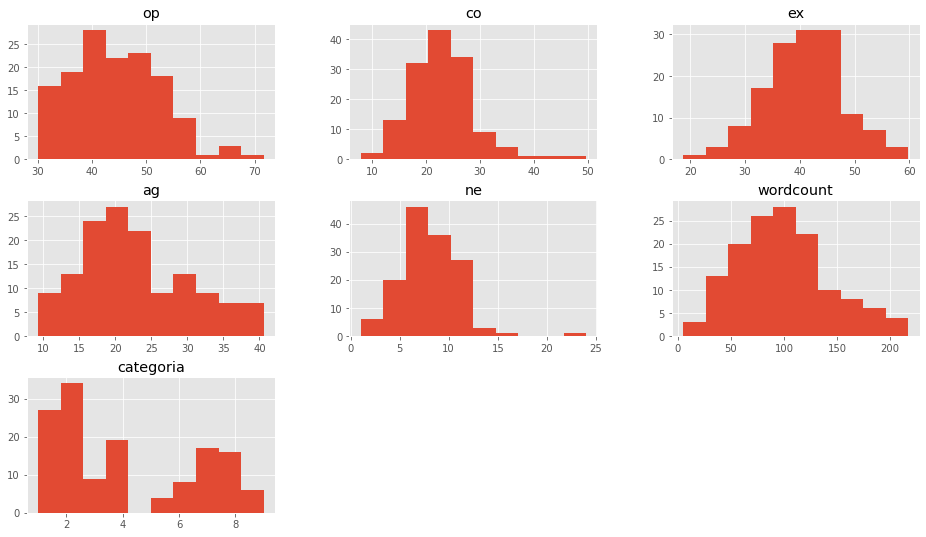

In [176]:
dataframe.hist()
plt.show()

<AxesSubplot:>

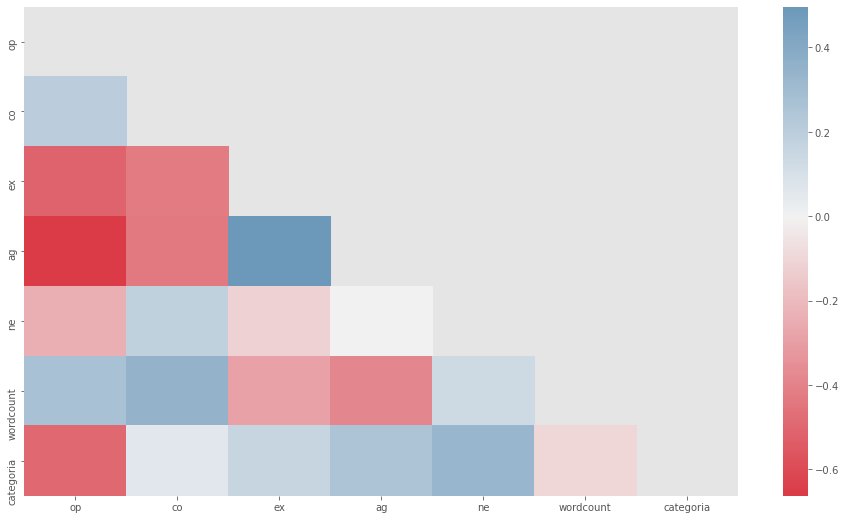

In [5]:
cmap = sb.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)
corr = dataframe.dropna().corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sb.heatmap(corr, mask=mask, center=0, cmap=cmap)

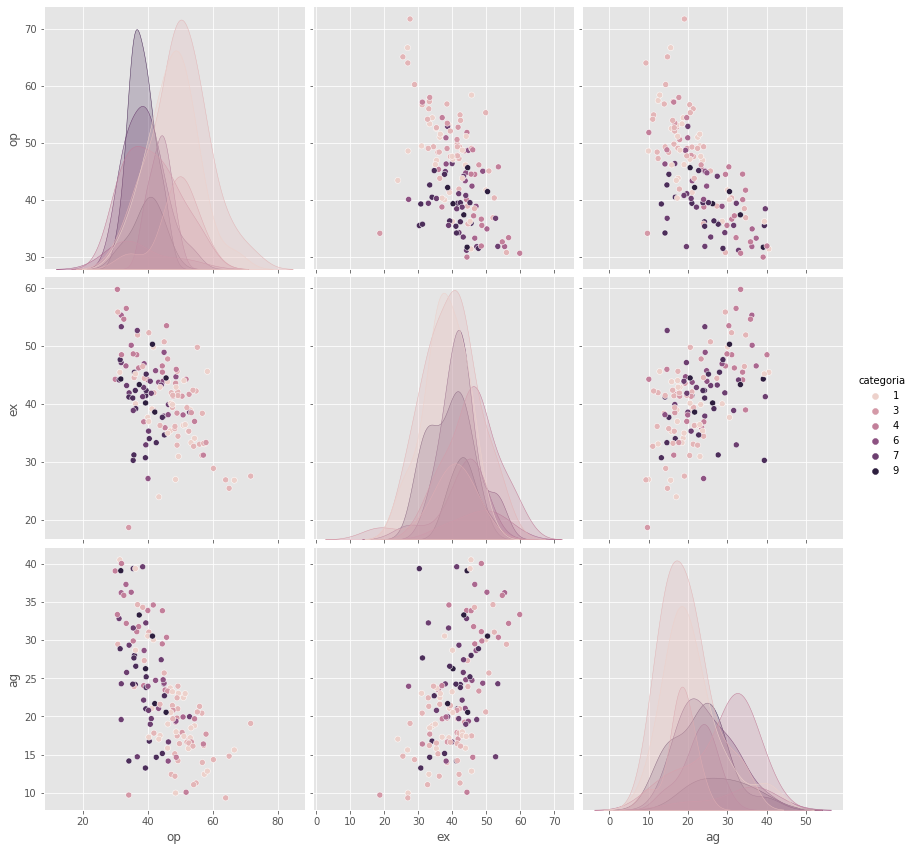

In [177]:
sb.pairplot(dataframe.dropna(), hue='categoria',height=4,vars=["op","ex","ag"],kind='scatter')

In [178]:
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe["categoria"])

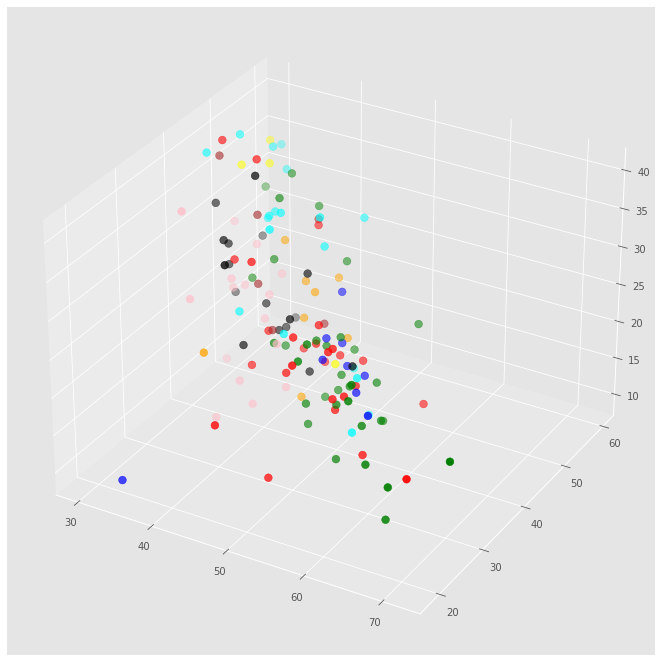

In [179]:
fig = plt.figure()
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)

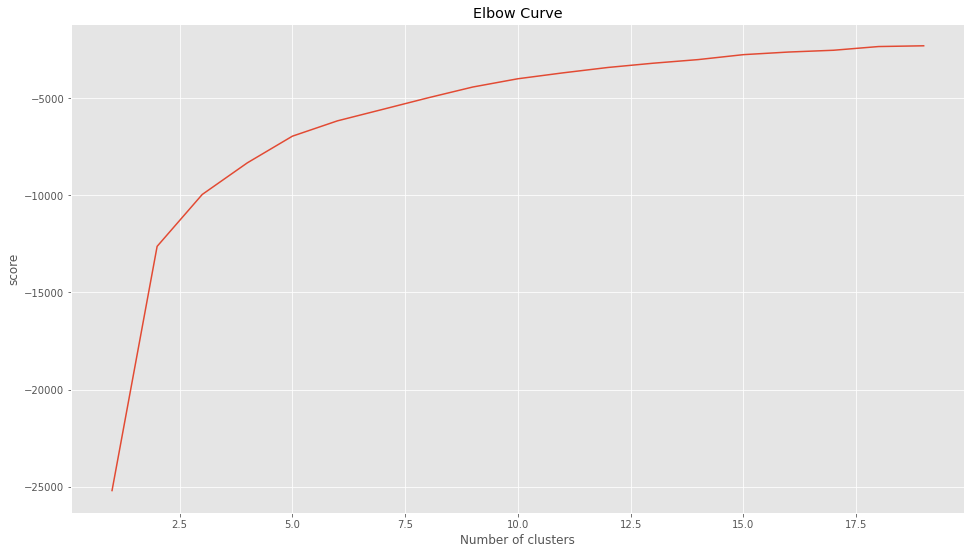

In [180]:
Nc = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel("Number of clusters")
plt.ylabel("score")
plt.title("Elbow Curve")
plt.show()

In [181]:
kmeans = KMeans(n_clusters=5).fit(X)
#cluster centers
centroids = kmeans.cluster_centers_
print(centroids)

[[49.99285115 40.87133549 17.47411785]
 [35.39154169 47.17372597 34.50044186]
 [58.58657531 31.02839375 15.6120435 ]
 [42.66891482 33.31008136 21.11530482]
 [39.55874337 44.81190669 24.291027  ]]


In [59]:
#predicting the clusters
labels = kmeans.predict(X)
labels

array([1, 3, 1, 1, 1, 3, 3, 1, 0, 4, 0, 3, 0, 0, 3, 0, 1, 3, 0, 1, 1, 0,
       4, 1, 0, 4, 1, 3, 3, 0, 3, 0, 0, 0, 1, 1, 1, 1, 3, 4, 3, 3, 3, 3,
       0, 2, 0, 0, 1, 1, 0, 3, 1, 2, 1, 0, 4, 0, 4, 2, 4, 3, 0, 2, 3, 3,
       2, 4, 0, 1, 3, 4, 0, 0, 3, 2, 3, 1, 1, 1, 1, 3, 2, 0, 4, 3, 0, 3,
       0, 0, 0, 4, 4, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 3, 3, 3, 0,
       3, 1, 1, 1, 3, 3, 4, 2, 1, 3, 4, 1, 0, 4, 2, 4, 4, 0, 0, 4, 0, 0,
       4, 3, 2, 1, 1, 2, 0, 1])

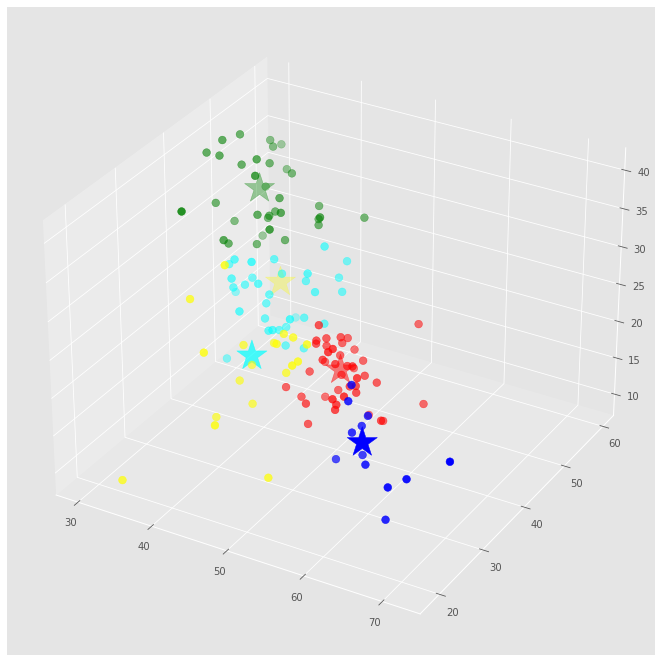

In [182]:
colores=['red','green','blue','cyan','yellow']
asignar=[]
for label in labels:
    asignar.append(colores[label])

fig=plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2], c=asignar, s=60)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', c=colores, s=1000)

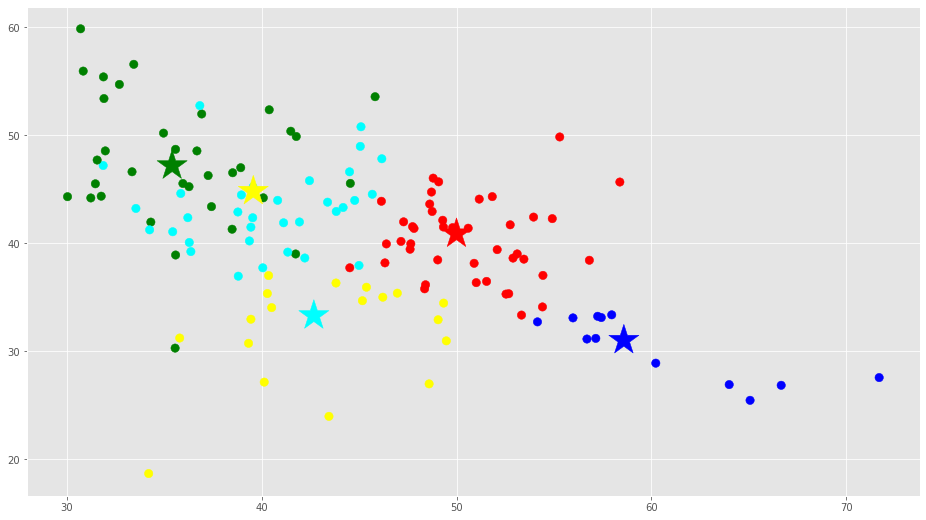

In [183]:
f1 = dataframe['op'].values
f2 = dataframe['ex'].values
f3 = dataframe['ag'].values

#op con ex
plt.scatter(f1,f2, c = asignar, s=70)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c=colores, s=1000)

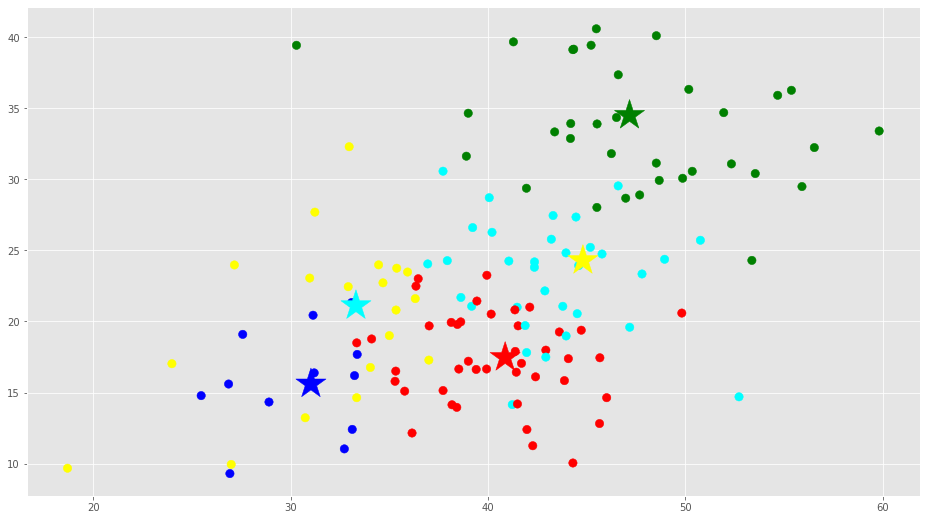

In [184]:
#ex con ag
plt.scatter(f2,f3, c = asignar, s=70)
plt.scatter(centroids[:, 1], centroids[:, 2], marker='*', c=colores, s=1000)

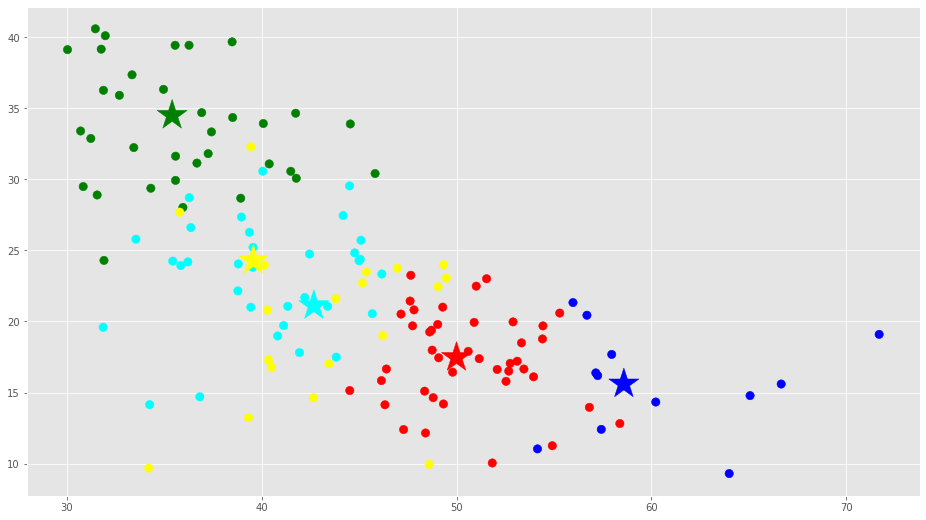

In [185]:
#op con ag
plt.scatter(f1,f3, c = asignar, s=70)
plt.scatter(centroids[:, 0], centroids[:, 2], marker='*', c=colores, s=1000)

In [186]:
gente['usuario']=dataframe['usuario'].values
gente['categoria']=dataframe['categoria'].values
gente['label'] = labels
gente['color'] = asignar
gente

,usuario,categoria,label,color
0,3gerardpique,7,1,green
1,aguerosergiokun,7,3,cyan
2,albertochicote,4,1,green
3,AlejandroSanz,2,1,green
4,alfredocasero1,4,1,green
...,...,...,...,...
135,XabiAlonso,7,1,green
136,XaviRodriguez,4,1,green
137,xoellopez,2,2,blue
138,ZacEfron,1,0,red


In [187]:
cantidadxgrupo = gente.groupby(['label','color']).size()
cantidadxgrupo

label  color 
0      red       42
1      green     34
2      blue      12
3      cyan      33
4      yellow    19
dtype: int64

In [188]:
#cantidad de famosos que son modelos (categoria 3) 
np.sum(dataframe['categoria'] == 3)

9

In [189]:
#categorias en grupo rojo
grupoRojo = gente[gente.color == 'red']
catidadxcategoria = grupoRojo.groupby(['categoria']).size()
catidadxcategoria

categoria
1    12
2    15
3     6
4     3
5     1
6     2
7     2
8     1
dtype: int64

In [190]:
closest = pairwise_distances_argmin_min(centroids, X)
celebridades = dataframe['usuario'].unique()
for row in closest[0]:
    print(celebridades[row])

carmenelectra
SerranoIsmael
JudgeJudy
kobebryant
Pablo_Iglesias_


In [191]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta
new_labels = kmeans.predict(X_new)
print(new_labels)

[4]
